 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns= whale_returns.sort_index()

In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algorithmic_returns = Path("Resources/algo_returns.csv")
algorithmic_returns = pd.read_csv(algorithmic_returns, index_col='Date', infer_datetime_format=True, parse_dates=True)
algorithmic_returns= algorithmic_returns.sort_index()

In [7]:
# Count nulls
algorithmic_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algorithmic_returns.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [39]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [10]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$","")
sp500_history['Close'] = sp500_history['Close'].str.replace(',','')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

C:\Users\mahlesah\anaconda3.2\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [12]:
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [13]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()

In [14]:
# Drop nulls
sp500_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"sp500_returns"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns, algorithmic_returns, sp500_returns], axis="columns", join="inner" )
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

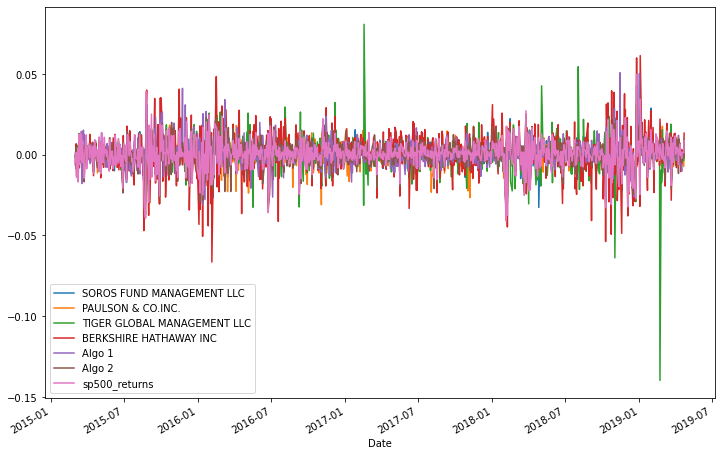

In [17]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(12, 8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

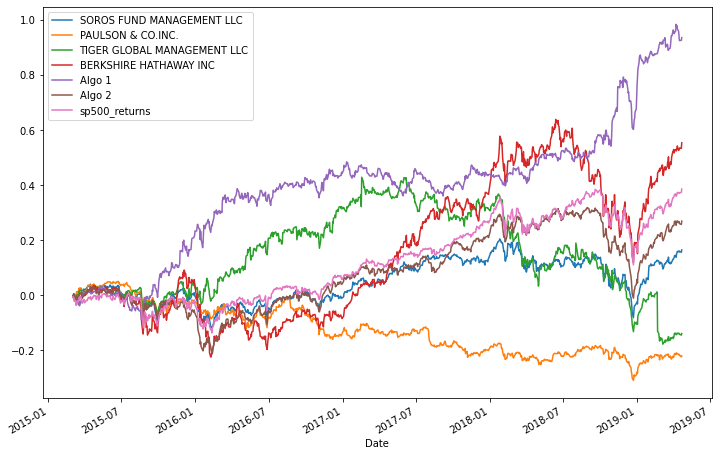

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

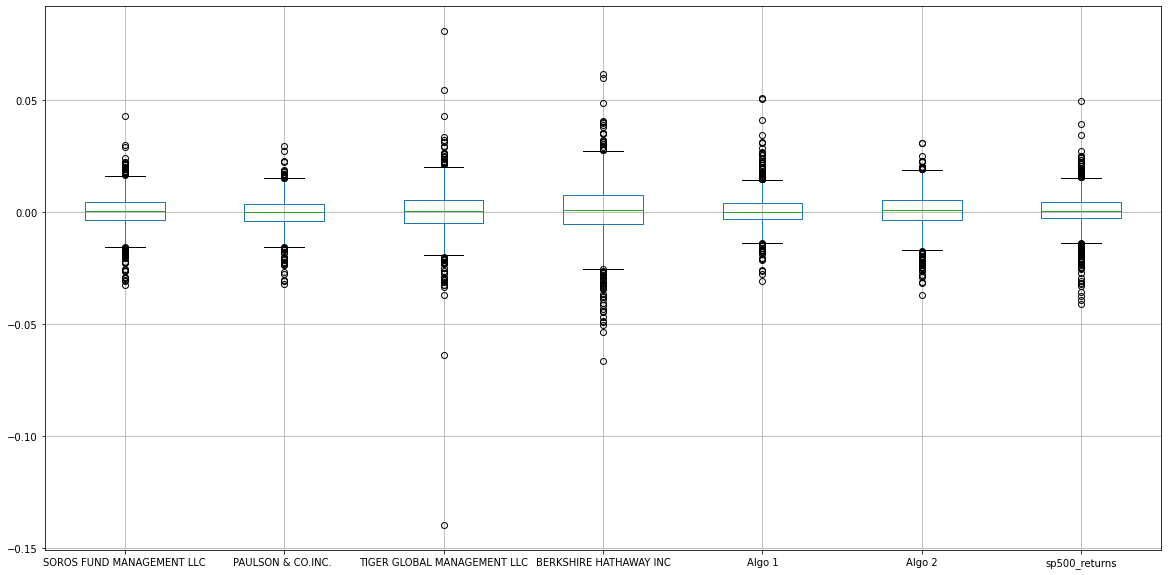

In [19]:
# Box plot to visually show risk
all_portfolios.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
std_all_portfolios = all_portfolios.std()

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
std_sp500 = sp500_returns.std()
# Determine which portfolios are riskier than the S&P 500
sp500_index = std_all_portfolios["sp500_returns"]
risk_assesment = list(std_all_portfolios.loc[std_all_portfolios > sp500_index].index)

In [22]:
risk_assesment

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

In [23]:
std_all_portfolios.loc[risk_assesment]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
std_yr = std_all_portfolios * np.sqrt(252)
std_yr

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500_returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day STD'}, xlabel='Date'>

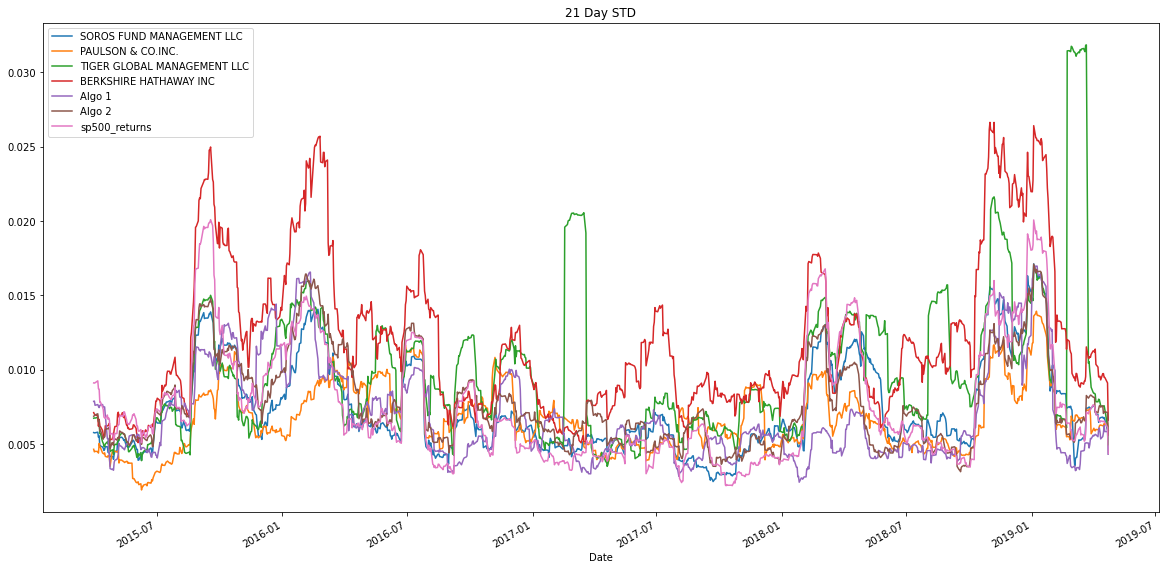

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_portfolios.rolling(window=21).std().plot(figsize=(20,10), title='21 Day STD')

### Calculate and plot the correlation

<AxesSubplot:>

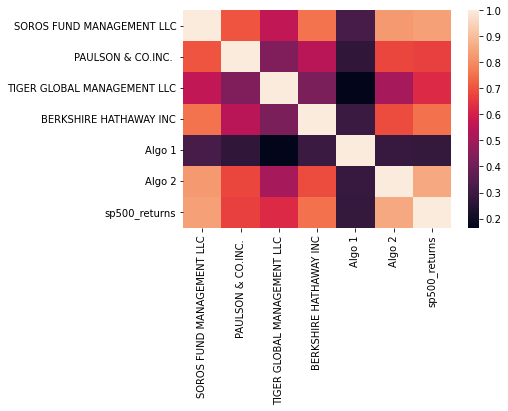

In [26]:
# Calculate the correlation
price_correlation = all_portfolios.corr()
# Display the correlation matrix
sns.heatmap(price_correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta plot'}, xlabel='Date'>

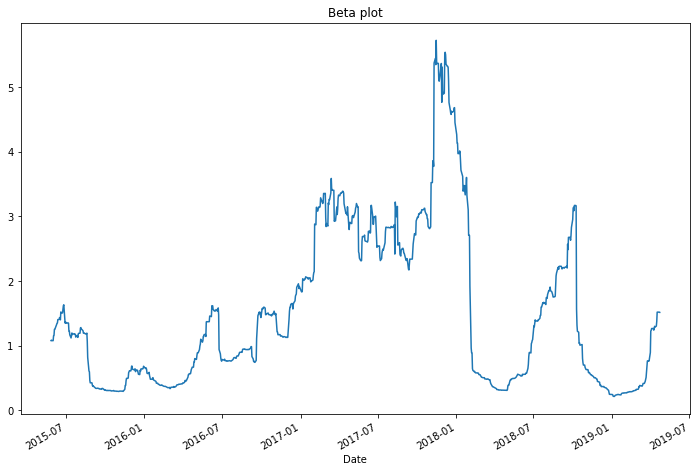

In [27]:
# Calculate covariance of a single portfolio
covariance = all_portfolios['SOROS FUND MANAGEMENT LLC'].cov(all_portfolios['sp500_returns'])
# Calculate variance of S&P 500
variance = all_portfolios['sp500_returns'].rolling(window=60).var()
# Computing beta
beta = covariance / variance
# Plot beta trend
beta_plot = beta.plot(figsize=(12,8), title='Beta plot')
beta_plot

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window
portfolio_ewm = all_portfolios.ewm(halflife=21).std().dropna()
portfolio_ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.003294
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.006498
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.007083
2015-03-10,0.005816,0.004707,0.006864,0.007841,0.002947,0.007315,0.008454
...,...,...,...,...,...,...,...
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007837
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007736
2019-04-18,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779,0.007610


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500_returns                  0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

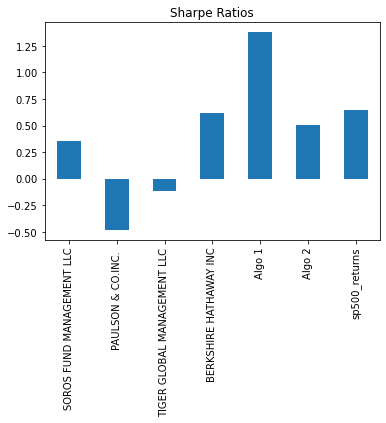

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind= "bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
# Reading data from 1st stock
apple_stock = Path('Resources/aapl_historical.csv')
apple_stock = pd.read_csv(apple_stock, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
apple_stock.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99
...,...,...
2019-05-03,AAPL,211.75
2019-05-06,AAPL,208.48
2019-05-07,AAPL,202.86


In [36]:
# Reading data from 2nd stock
costco_stock = Path('Resources/cost_historical.csv')
costco_stock = pd.read_csv(costco_stock , index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_stock.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [41]:
# Reading data from 3rd stock
google_stock = Path('Resources/goog_historical.csv')
google_stock = pd.read_csv(google_stock, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
google_stock.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [43]:
# Combine all stocks in a single DataFrame
accumulated_stocks_df = pd.concat([apple_stock, google_stock, costco_stock], axis = 'columns', join = 'inner')
accumulated_stocks_df.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [ ]:
# Reset Date index
#N/A

In [44]:
# Reorganize portfolio data by having a column per symbol
accumulated_stocks_df.reset_index(inplace=True)
accumulated_stocks_df = pd.concat([apple_stock, google_stock, costco_stock], axis = 'rows', join = 'inner')
accumulated_stocks_df = accumulated_stocks_df.pivot_table(values='NOCP',  index='Trade DATE', columns='Symbol')
accumulated_stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [48]:
# Calculate daily returns
daily_returns = accumulated_stocks_df.pct_change()
daily_returns.head()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weights_returns = daily_returns.dot(weights)

# Display sample data
weights_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# Join your returns DataFrame to the original returns DataFrame
combined_dataframe= pd.DataFrame({"AAPL": daily_returns["AAPL"], "COST": daily_returns["COST"], "GOOG": daily_returns["GOOG"], "Returns": weights_returns})
combined_dataframe.head()

,AAPL,COST,GOOG,Returns
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
calculated_returns_std  = daily_returns.std()
calculated_yearly_std = calculated_returns_std * np.sqrt(252)
calculated_yearly_std

Symbol
AAPL    0.296955
COST    0.209320
GOOG    0.263554
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Standard Deviation'}, xlabel='Trade DATE'>

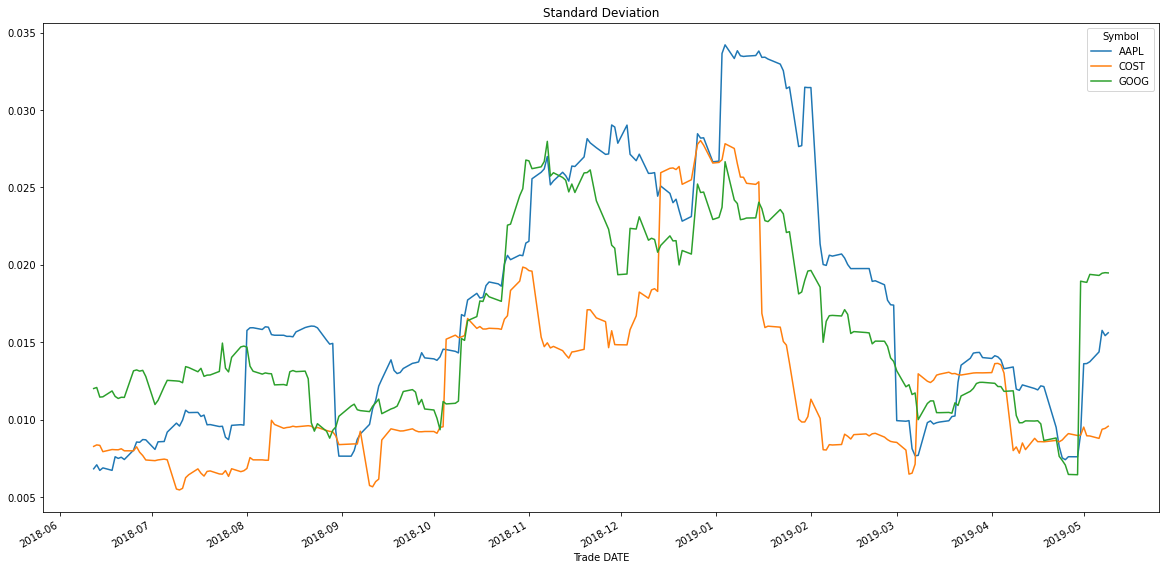

In [53]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
daily_returns.rolling(window=21).std().plot(figsize=(20,10), title="Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

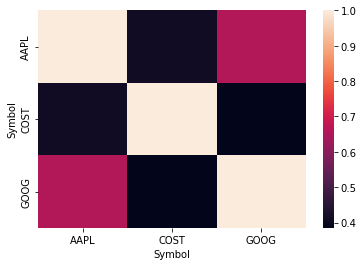

In [55]:
# Calculate and plot the correlation
correlated_returns = daily_returns.corr()
sns.heatmap(correlated_returns)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

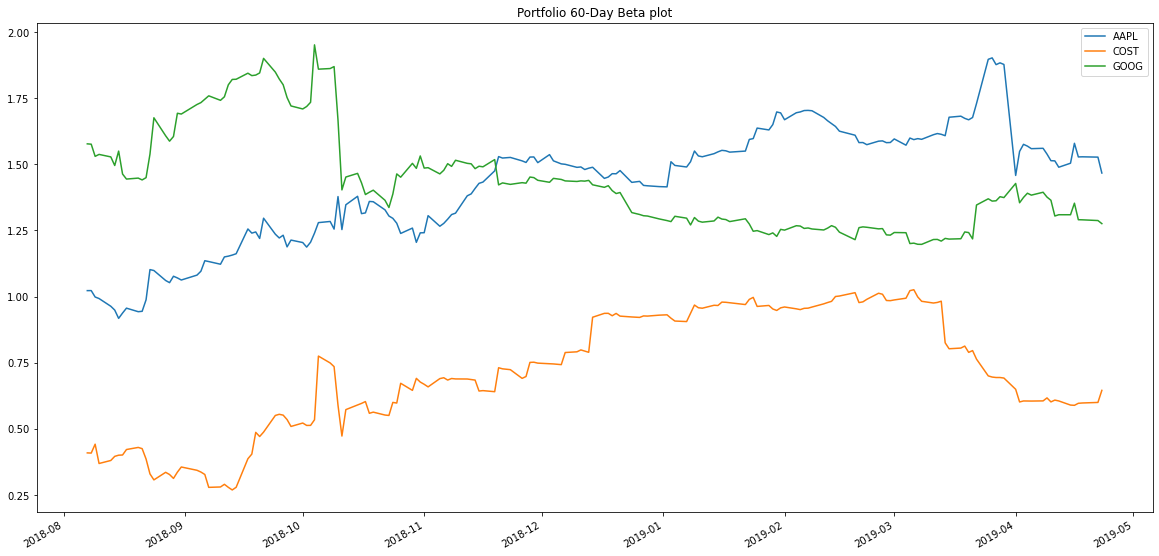

In [70]:
# Calculate and plot Beta
aapl_covariance = daily_returns['AAPL'].rolling(window=60).cov(all_portfolios['sp500_returns'])
cost_covariance = daily_returns['COST'].rolling(window=60).cov(all_portfolios['sp500_returns'])
goog_covariance = daily_returns['GOOG'].rolling(window=60).cov(all_portfolios['sp500_returns'])

rolling_variance = all_portfolios['sp500_returns'].rolling(window=60).var()

rolling_aapl_beta = aapl_covariance / rolling_variance
rolling_cost_beta = cost_covariance / rolling_variance
rolling_goog_beta = goog_covariance / rolling_variance


# Plot beta trend
portfolio = rolling_aapl_beta.plot(figsize=(20,10), title="Portfolio 60-Day Beta plot")
rolling_cost_beta.plot(ax=portfolio)
rolling_goog_beta.plot(ax=portfolio)
portfolio.legend(["AAPL","COST","GOOG"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_2 = ((daily_returns.mean()-all_portfolios["sp500_returns"].mean()) * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratio_2

Symbol
AAPL    0.064878
COST    0.739950
GOOG    0.015662
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Stocks'}, xlabel='Symbol'>

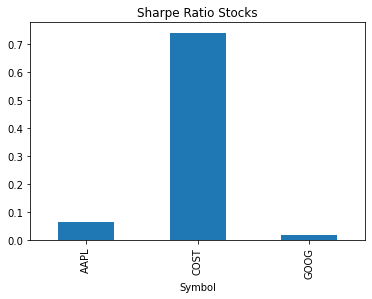

In [75]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2.plot(kind="bar", title="Sharpe Ratio Stocks")

### How does your portfolio do?

Write your answer here!

My portfolio focuses on large returns for Costco, which seems to me as a fairly balanced portfolio where one stock makes up for the return percentage of the other two. I would like to try a new portfolio next time; this is NOT financial advice! :)